<a href="https://colab.research.google.com/github/Ayush-corp/Optical-Recognition-of-Handwritten-Digits/blob/main/CPSC_585_01_Introductory_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary packages


In [31]:
import numpy as np
import random as r
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# Load the Dataset

In [32]:
# Load Digits Data
digits = load_digits()
print(digits.data.shape)

(1797, 64)


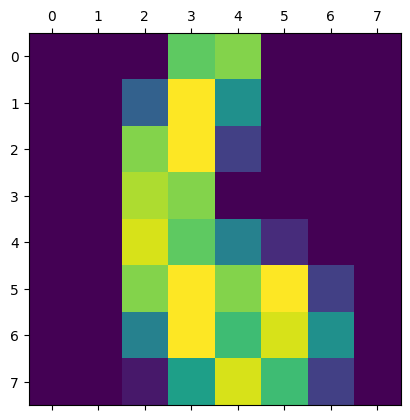

In [33]:
# Plotting any image for checking
plt.matshow(digits.images[6])
plt.show()

In [34]:
# Checking the Type of dataset
type(digits)

sklearn.utils._bunch.Bunch

In [35]:
# Printing out the Target Names
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# Printing out the dataset
digits_as_frame = load_digits(as_frame=True)
digits_as_frame.data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Splitting the dataset into Train Data and Test Data

In [37]:
X,Y = digits.data, digits.target

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## Checking the Train Dataset

In [39]:
print(type(X_train))
print(X_train.shape)
X_train

<class 'numpy.ndarray'>
(1437, 64)


array([[ 0.,  0.,  4., ..., 12.,  5.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  8.,  0.,  0.],
       [ 0.,  0.,  1., ...,  9.,  0.,  0.]])

In [40]:
print(Y_train.shape)
Y_train

(1437,)


array([8, 4, 4, ..., 7, 0, 1])

In [41]:
X_train.shape[1]

64

In [42]:
Y_train.shape

(1437,)

## Reshaping using one hot encoding for Train and Test labels.

In [43]:
y_train = to_categorical(Y_train, num_classes=10)
y_test = to_categorical(Y_test, num_classes=10)

# Task 1

## Creating a Model using keras with 2 Hidden Layers of 512 Nodes

In [44]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compiling the model using the categorical cross-entropy loss function, the adam optimizer, and accuracy as the evaluation metric.

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Printing Model Summary

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               33280     
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 301066 (1.15 MB)
Trainable params: 301066 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training the model for 20 epochs with batch size of 64 and evaluating the model.

In [47]:
# Train the model
batch_size = 64
epochs = 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
23/23 [==============================] - 1s 12ms/step - loss: 1.0054 - accuracy: 0.7530 - val_loss: 0.1938 - val_accuracy: 0.9306
Epoch 2/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0990 - accuracy: 0.9659 - val_loss: 0.1518 - val_accuracy: 0.9389
Epoch 3/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0432 - accuracy: 0.9875 - val_loss: 0.0988 - val_accuracy: 0.9667
Epoch 4/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.9972 - val_loss: 0.1027 - val_accuracy: 0.9667
Epoch 5/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0159 - accuracy: 0.9972 - val_loss: 0.0885 - val_accuracy: 0.9611
Epoch 6/20
23/23 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 7/20
23/23 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9667
Epoch 8/20
23/23 [=

## Print the test loss and accuracy

In [48]:
# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0752997100353241
Test accuracy: 0.9777777791023254


## Predicting the test data by the model.

In [49]:
Model_Predict = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


# Task 2

## Getting Weights and Bias Vector from Model's get_weights method

In [50]:
w1,b1,w2,b2,w3,b3 = model.get_weights()
weight_bias_list = [[w1,b1],[w2,b2],[w3,b3]]

## Checking out the Weight and Bias data

In [51]:
print(w1.shape)
print(b1.shape)
print(w2.shape)

(64, 512)
(512,)
(512, 512)


## Function Softmax(z) that takes in a vector z and returns the softmax of that vector.


In [52]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z / exp_z.sum()

## Rectified Linear Unit (ReLU) activation function in Python


In [53]:
def relu(z):
  return np.maximum(0, z)

## Performing forward propagation by computing the dot product of the weight and input matrices, adding bias, and applying a non-linear activation function like ReLU or softmax to the result.
## Transposing the matrices for matrix multiplication.

In [54]:
def predict(input):
  for i,e in enumerate(weight_bias_list):
    temp = np.dot(np.transpose(e[0]), input) + e[1]
    if i == len(weight_bias_list) - 1:
      input = softmax(temp)
      return np.argmax(input)
    input = relu(temp)


## Testing the Predict Method on Test Data

In [55]:
predict(X_test[1])

7

In [56]:
Y_test[1]

7

In [57]:
print(predict(X_test[1]) == Y_test[1])

True


# Task 3

## Plotting the 1st image using Matlib library

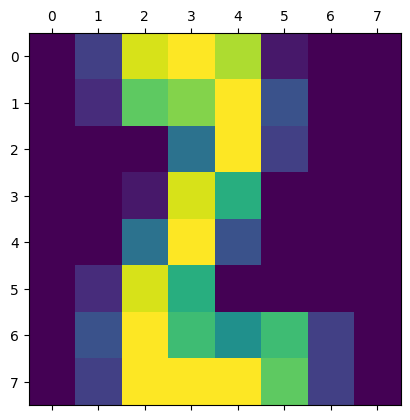

In [58]:
plt.matshow(X_test[0].reshape(8,8))

## Actual Label for the above image

In [59]:
Y_test[0]

2

## Predicted Output for the above image using Predict method

In [60]:
predict(X_test[0])

2

## Predicted Output for the above image using the Keras Model

In [61]:
np.argmax(Model_Predict[0])

2

## Trying to compare Multiple images and their outputs from both the Models and also trying to plot the image.
## Since Matlib plot is running asynchronously, the images are getting plotted in the end.bold text

Image 1
6
6
6
Image 2
0
0
0


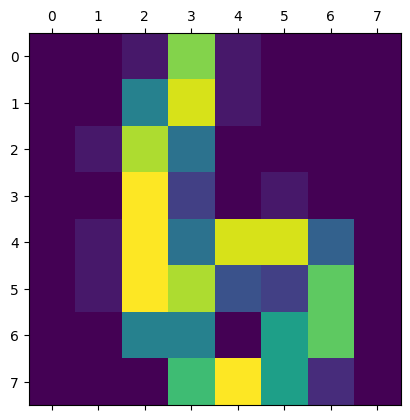

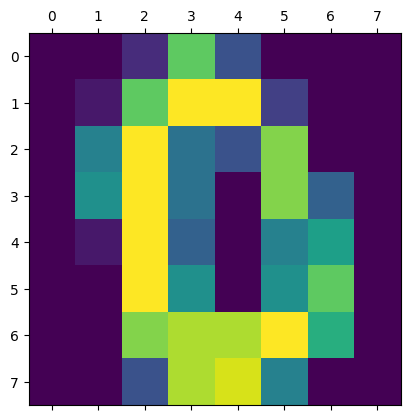

In [62]:
for i in range(2):
  j = r.randrange(len(X_test))
  plt.matshow(X_test[j].reshape(8,8))
  print(f"Image {i+1}")
  print(Y_test[j])
  print(predict(X_test[j]))
  print(np.argmax(Model_Predict[j]))

## Printing out the Accuracy for both Models

In [63]:
model_true_count, predict_true_count = 0, 0

for i in range(len(X_test)):
  model_true_count += 1 if Y_test[i] ==  np.argmax(Model_Predict[i]) else 0
  predict_true_count += 1 if Y_test[i] ==  predict(X_test[i]) else 0
print(f"Keras Model Accuracy : {model_true_count/len(X_test)}")
print(f"Manual Predict Model Accuracy : {predict_true_count/len(X_test)}")

Keras Model Accuracy : 0.9777777777777777
Manual Predict Model Accuracy : 0.9777777777777777
